In [1]:
from tdc.multi_pred import DTI

data = DTI("BindingDB_IC50", print_stats=True)

#help(data)

Downloading...
100%|██████████| 839M/839M [02:15<00:00, 6.18MiB/s] 
Loading...
--- Dataset Statistics ---
548633 unique drugs.
5077 unique targets.
990630 drug-target pairs.
--------------------------
Done!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data.get_data()

df

,Drug_ID,Drug,Target_ID,Target,Y
0,71463198.0,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0
1,44640149.0,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9
2,65023.0,CC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,8.5
3,461984.0,CCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,177.0
4,461988.0,COCCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H]...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,164.0
...,...,...,...,...,...
990625,76336413.0,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0
990626,76311049.0,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0
990627,76321936.0,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0
990628,76329133.0,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990630 entries, 0 to 990629
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Drug_ID    981408 non-null  float64
 1   Drug       990630 non-null  object 
 2   Target_ID  868490 non-null  object 
 3   Target     990630 non-null  object 
 4   Y          990630 non-null  float64
dtypes: float64(2), object(3)
memory usage: 37.8+ MB


In [4]:
df.describe()

,Drug_ID,Y
count,9.814080e+05,9.906300e+05
mean,5.977451e+07,3.956484e+04
std,4.342801e+07,3.829574e+05
min,7.000000e+00,0.000000e+00
25%,1.605078e+07,3.200000e+01
50%,5.457863e+07,5.000000e+02
75%,9.064347e+07,8.800000e+03
max,1.458668e+08,1.000000e+07


1. Distribution of Affinity Values (Y):

This plot reveals the spread of binding affinities in your dataset. You can use a histogram or a KDE plot:

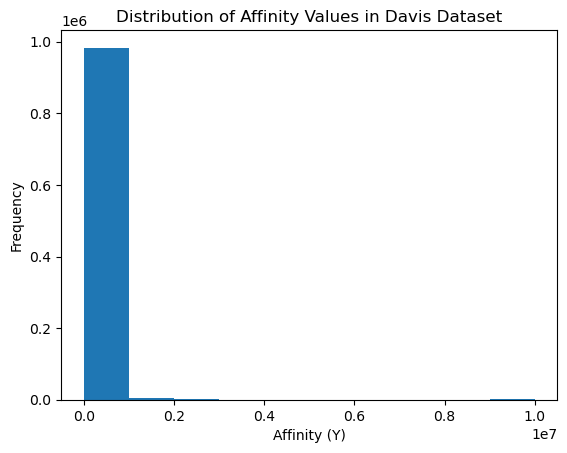

In [5]:
# Assuming 'Y' represents affinity values
plt.hist(df['Y'])
plt.xlabel('Affinity (Y)')
plt.ylabel('Frequency')
plt.title('Distribution of Affinity Values in Davis Dataset')
plt.show()

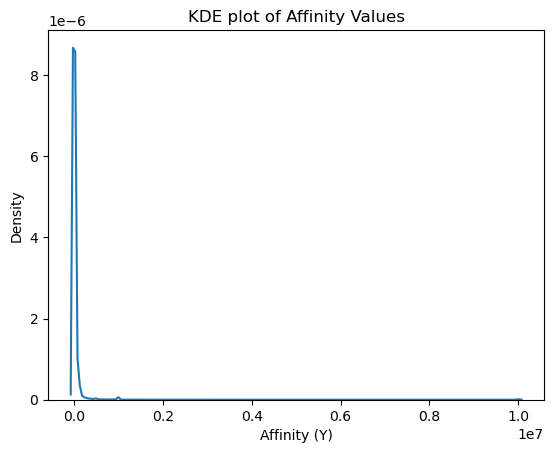

In [6]:
# For Kernel Density Estimation (KDE) plot
sns.kdeplot(df['Y'])  # Using seaborn for KDE plot
plt.xlabel('Affinity (Y)')
plt.ylabel('Density')
plt.title('KDE plot of Affinity Values')
plt.show()

2. Drug Counts per Target:

This plot explores the number of drugs interacting with each target protein. It can reveal potential biases or sparsity:

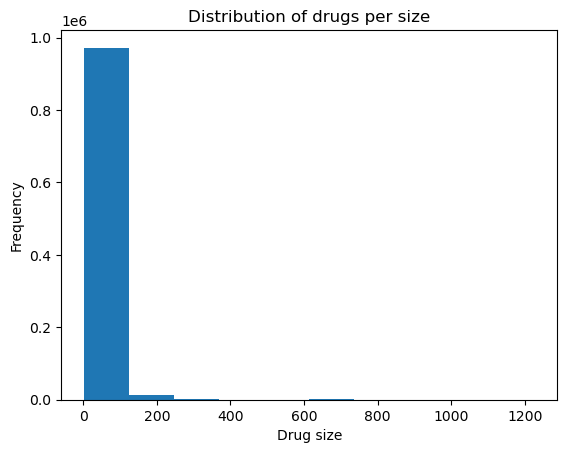

In [7]:
# Assuming 'Target_ID' is your identifier for targets
target_counts = df['Drug'].apply(len)
target_counts.plot(kind='hist', title='Distribution of drugs per size')
plt.xlabel('Drug size')
plt.ylabel('Frequency')
plt.show()

3. Scatter Plot of Affinity (Y) vs. Target Sequence Length (if available):

This plot investigates the relationship between target protein sequence length and binding affinity:

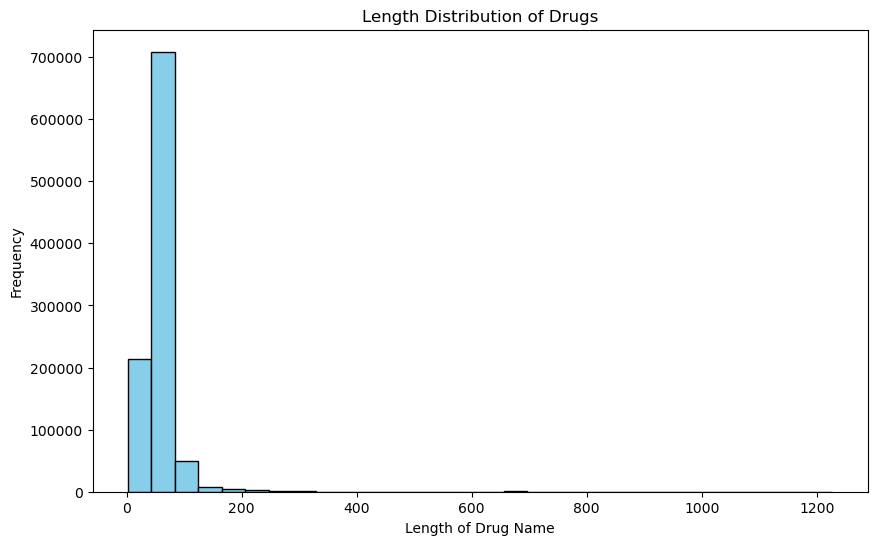

In [8]:
# Assuming 'df' is your DataFrame
df['Drug_length'] = df['Drug'].apply(len)

plt.figure(figsize=(10,6))
plt.hist(df['Drug_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Length Distribution of Drugs')
plt.xlabel('Length of Drug Name')
plt.ylabel('Frequency')
plt.show()

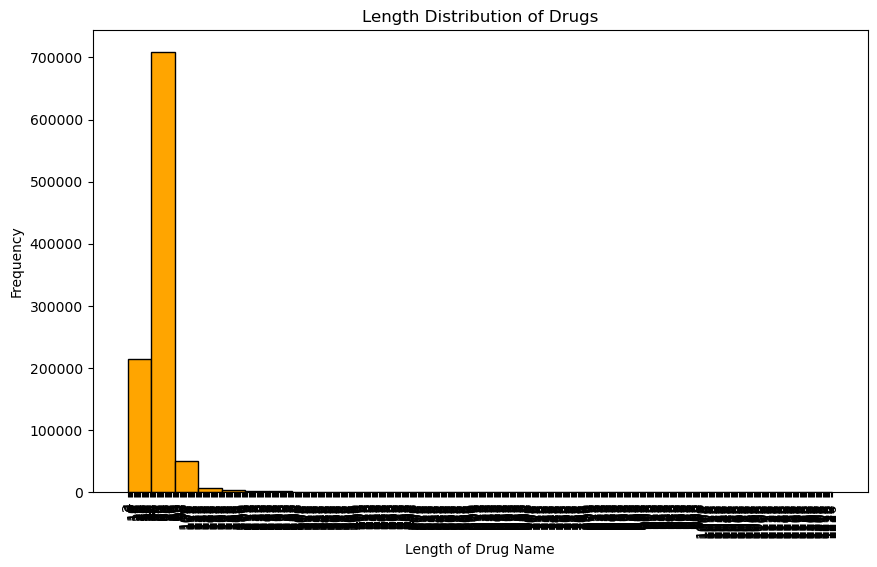

In [9]:
plt.figure(figsize=(10,6))
plt.hist(df['Drug_length'], bins=30, color='orange', edgecolor='black')  # Increase the number of bins to 100
plt.title('Length Distribution of Drugs')
plt.xlabel('Length of Drug Name')
plt.ylabel('Frequency')

# Set xticks to have more labels on x-axis
xticks = range(min(df['Drug_length']), max(df['Drug_length'])+1, 2)
plt.xticks(xticks, rotation=90)

plt.show()

In [10]:
# Assuming you have a column for 'Target_Length'
plt.scatter(df['Target_Length'], df['Y'])
plt.xlabel('Target Sequence Length')
plt.ylabel('Affinity (Y)')
plt.title('Affinity vs. Target Sequence Length')
plt.show()

KeyError: 'Target_Length'

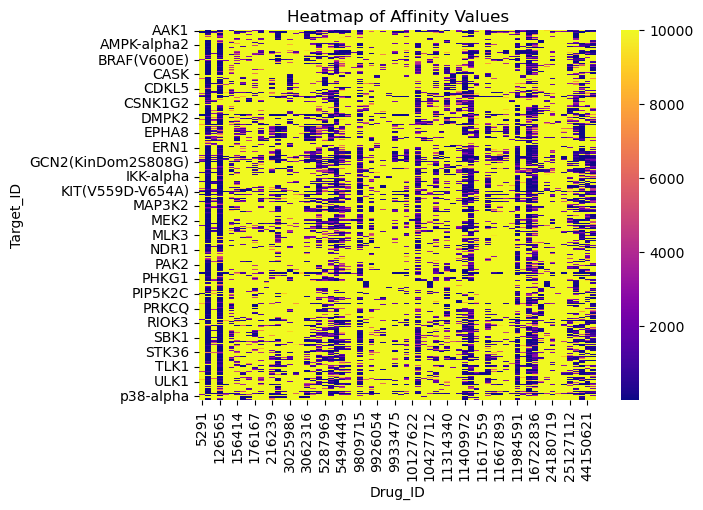

In [ ]:
# Assuming 'Drug_ID' and 'Target_ID' are for rows and columns
pivot_table = pd.pivot_table(df, values='Y', index='Target_ID', columns='Drug_ID')
sns.heatmap(pivot_table, cmap='plasma')  # Using seaborn for heatmap
plt.title('Heatmap of Affinity Values')
plt.show()